<a href="https://colab.research.google.com/github/MartaPCastillo/Simulacion-II/blob/main/Ingenieria_Financiera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
assert sys.version_info >= (3,5)

In [9]:
import sklearn
assert sklearn.__version__ >= "0.20" # Use double underscores to access version

In [25]:
import numpy as np
import os

In [11]:
np.random.seed(42)

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [16]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID="unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [17]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [18]:
import warnings

In [19]:
warnings.filterwarnings(action="ignore", message="^internal gelsd")

##Supervised VS Unsupervised

Utilizaremos el Data Set de Iris, el cuàl nos brinda 4 features para clasificar tres tipos de flores.

In [21]:
#Load Iris Data Set
from sklearn.datasets import load_iris

In [33]:
data = load_iris()
X = data.data
Y = data.target

In [34]:
np.array(['setosa','versicolor', 'virginica'], dtype='<U10')

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
plt.figure(figsize=(9,3.5))

<Figure size 900x350 with 0 Axes>

<Figure size 900x350 with 0 Axes>

Saving figure classification_vs_clustering_plot


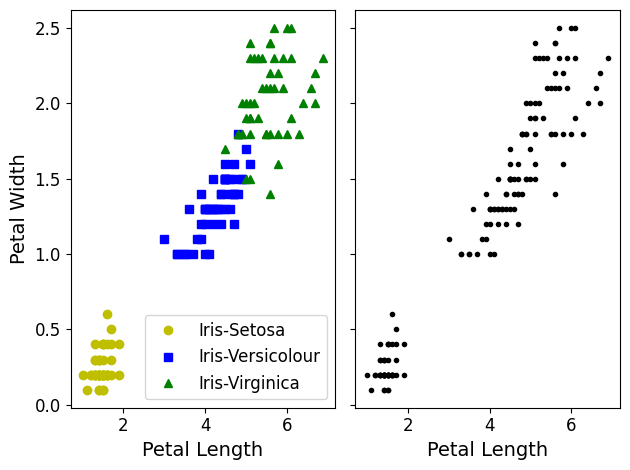

In [43]:
#Plotting Supervised Algorithm Task
plt.subplot(121)
plt.plot(X[Y==0,2], X[Y==0,3], "yo", label="Iris-Setosa")
plt.plot(X[Y==1,2], X[Y==1,3], "bs", label="Iris-Versicolour")
plt.plot(X[Y==2,2], X[Y==2,3], "g^", label="Iris-Virginica")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(fontsize=12)

#Plotting Unsupervised Algorithm Task
plt.subplot(122)
plt.scatter(X[:,2], X[:,3], c="k", marker=".")
plt.xlabel("Petal Length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

In [44]:
#Using Gaussian Mixture to Predict clùsters pertenence on elements
from sklearn.mixture import GaussianMixture

In [46]:
#Create model using 3 components (clusters) and predict labels for training set
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2,0,1])

In [47]:
#just map labels in mapping according to id y_pred
y_pred=np.array([mapping[cluster_id] for cluster_id in y_pred])

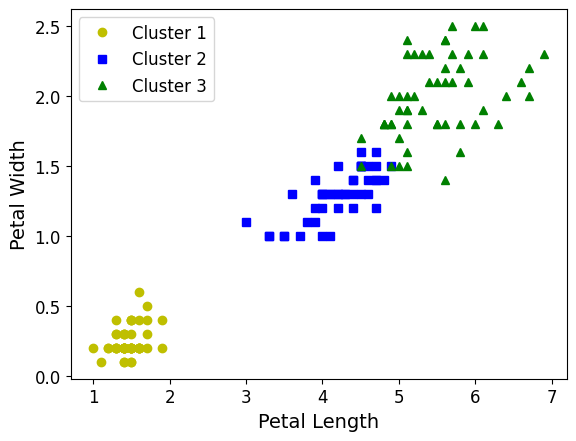

In [48]:
plt.plot(X[y_pred==0,2], X[y_pred==0,3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1,2], X[y_pred==1,3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2,2], X[y_pred==2,3], "g^", label="Cluster 3")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left",fontsize=12)
plt.show()

##K-Means

In [50]:
#Generate Artifical Data

#Make blobs generate isotropic Gaussian blobs for clustering
#Osease bolitas de puntos aleatorios con distribuciò normal.
from sklearn.datasets import make_blobs

In [52]:
#Centros de las distribuciones arbitrarios
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5, 2.3],
     [-0.5, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [54]:
X,y = make_blobs(n_samples=2000, centers=blob_centers,
                cluster_std=blob_std, random_state=7)

In [55]:
#Function for plotting cluster graphics
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s = 1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


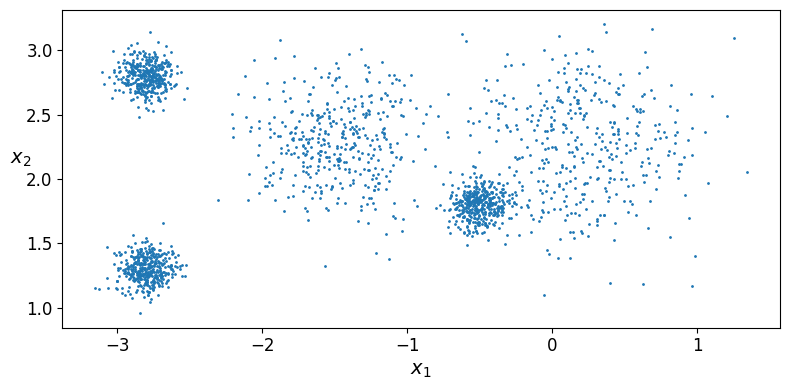

In [56]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

In [57]:
#Constructing K-Means mmodel
from sklearn.cluster import KMeans

In [58]:
k = 5 #We want 5 centers
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 4, ..., 1, 4, 0], dtype=int32)

In [59]:
kmeans.cluster_centers_

array([[-0.46504499,  1.81706352],
       [-2.7943747 ,  2.79740645],
       [-2.79898734,  1.30270021],
       [-1.48877647,  2.30116019],
       [ 0.30387655,  2.34630229]])

In [60]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [70]:
def plot_centroids(clusterer, weights=None, circle_color = 'W', cross_color = 'k'):
    centroids = clusterer.cluster_centers_
    if weights is not None:
        centroids = centroids[weights>weights.max()/10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=5, linewidths=50,
                color=cross_color, zorder=11, alpha = 1)

In [68]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                         show_xlabels=True, show_ylabels=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')

  plot_data(X)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)

  if show_xlabels:
    plt.xlabel("$x_1$", fontsize=14)
  else:
    plt.tick_params(labelbottom=False)

  if show_ylabels:
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
  else:
    plt.tick_params(labelleft=False)


AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

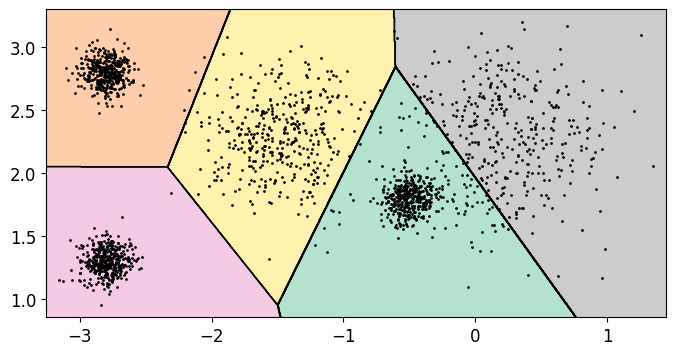

In [71]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()